In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [3]:
env = gym.make('MountainCar-v0')
env.reset()

array([-0.56255833,  0.        ])

In [11]:
num_states = (env.observation_space.high - env.observation_space.low) *\
 np.array([10, 100])
num_states = np.round(num_states, 0).astype(int) + 1

In [28]:
alpha=0.1
gamma=0.95
total_episodes=8000
epsilon = 1
min_eps = 0
reward_list = []
avg_reward_list = []

In [14]:
QTable = np.random.uniform(low=-1, high=1,
                          size=(num_states[0], num_states[1],
                                env.action_space.n))

In [17]:
decay_factor = (epsilon - min_eps)/total_episodes

In [29]:
for i in range(total_episodes):
      done = False
      total_reward, reward = 0, 0
      s = env.reset()

      s_adj = (s - env.observation_space.low)*np.array([10, 100])
      s_adj = np.round(s_adj, 0).astype(int)

      while done != True:
          if np.random.random() < 1 - epsilon:
              action = np.argmax(QTable[s_adj[0], s_adj[1]])
          else:
              action = np.random.randint(0, env.action_space.n)

          s_prime, reward, done, info = env.step(action)

          s_prime_adj = (s_prime - env.observation_space.low) * np.array([10, 100])
          s_prime_adj = np.round(s_prime_adj, 0).astype(int)

          if done and s_prime[0] >= 0.5:
              QTable[s_adj[0], s_adj[1], action] = reward


          else:
              delta = alpha*(reward +
                                gamma*np.max(QTable[s_prime_adj[0],
                                                  s_prime_adj[1]]) -
                                QTable[s_adj[0], s_adj[1], action])
              QTable[s_adj[0], s_adj[1], action] += delta


          total_reward += reward
          s_adj = s_prime_adj

      if epsilon > min_eps:
          epsilon -= decay_factor

      reward_list.append(total_reward)

      if (i+1) % 100 == 0:
          avg_reward = np.mean(reward_list)
          avg_reward_list.append(avg_reward)
          reward_list = []

      if (i+1) % 1000 == 0:
          print('Episode {} Average Reward: {}'.format(i+1, avg_reward))

env.close()

Episode 1000 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 3000 Average Reward: -200.0
Episode 4000 Average Reward: -199.34
Episode 5000 Average Reward: -199.82
Episode 6000 Average Reward: -189.88
Episode 7000 Average Reward: -192.05
Episode 8000 Average Reward: -145.96


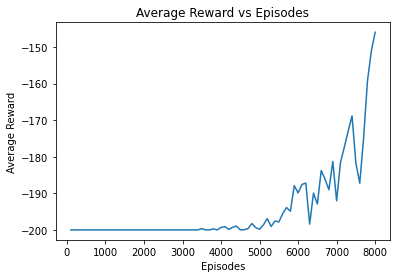

In [31]:
plt.plot(100*(np.arange(len(avg_reward_list)) + 1), avg_reward_list)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()
#plt.savefig('rewards.jpg')
plt.close()
